In [52]:
import os
import openai
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('API_keys/my_key') as f: # API key file
    api_key = f.read()
openai.api_key = api_key
os.environ['OPENAI_API_KEY'] = api_key

In [3]:
training_data = r'data\random_embedding-training.jsonl'
testing_data = r'data\random_embedding-testing.jsonl'

In [4]:
# change to openai env
!activate openai

In [16]:
# start fine-tune
!openai api fine_tunes.create -t $training_data -v $testing_data -m ada --compute_classification_metrics --classification_n_classes 10

Uploaded file from data\random_embedding-training.jsonl: file-LdSQQf1H0hzWIXQv7OVbVDIV


Upload progress:   0%|          | 0.00/930k [00:00<?, ?it/s]
Upload progress: 100%|██████████| 930k/930k [00:00<00:00, 1.88Git/s]

Upload progress:   0%|          | 0.00/465k [00:00<?, ?it/s]
Upload progress: 100%|██████████| 465k/465k [00:00<00:00, 937Mit/s]



Uploaded file from data\random_embedding-testing.jsonl: file-BxWGjV61qALeUamqflifGcA0
Created fine-tune: ft-9AS69RbswcnQ0dcU44QJaRQV
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-04-11 14:41:25] Created fine-tune: ft-9AS69RbswcnQ0dcU44QJaRQV
[2023-04-11 14:41:36] Fine-tune costs $0.82
[2023-04-11 14:41:36] Fine-tune enqueued. Queue number: 6
[2023-04-11 14:42:16] Fine-tune is in the queue. Queue number: 5



In [33]:
# if interrupted, continue training
!openai api fine_tunes.follow -i ft-9AS69RbswcnQ0dcU44QJaRQV

[2023-04-11 14:41:25] Created fine-tune: ft-9AS69RbswcnQ0dcU44QJaRQV
[2023-04-11 14:41:36] Fine-tune costs $0.82
[2023-04-11 14:41:36] Fine-tune enqueued. Queue number: 6
[2023-04-11 14:42:16] Fine-tune is in the queue. Queue number: 5
[2023-04-11 14:44:49] Fine-tune is in the queue. Queue number: 4
[2023-04-11 14:45:22] Fine-tune is in the queue. Queue number: 3
[2023-04-11 14:46:02] Fine-tune is in the queue. Queue number: 2
[2023-04-11 14:49:46] Fine-tune is in the queue. Queue number: 1
[2023-04-11 14:50:29] Fine-tune is in the queue. Queue number: 0
[2023-04-11 14:51:13] Fine-tune started
[2023-04-11 14:54:21] Completed epoch 1/4
[2023-04-11 14:57:25] Completed epoch 2/4
[2023-04-11 15:00:26] Completed epoch 3/4
[2023-04-11 15:03:28] Completed epoch 4/4
[2023-04-11 15:04:03] Uploaded model: ada:ft-personal-2023-04-11-07-04-02
[2023-04-11 15:04:03] Uploaded result file: file-uhXkSmloBCHlYDpbmAMNFQ3s
[2023-04-11 15:04:03] Fine-tune succeeded

Job complete! Status: succeeded
Try out 

In [43]:
result_file = 'results/ada-20230411.csv'
!openai api fine_tunes.results -i ft-9AS69RbswcnQ0dcU44QJaRQV > $result_file

In [64]:
results = pd.read_csv(result_file)
results[results['classification/accuracy'].notna()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
2001,2002,2062900,4004,0.017134,1.0,1.0,NaN,NaN,NaN,1.0,1.0


In [65]:
def show_training_log(logs):
    plt.figure(figsize=(10, 5))
    for p, phase in enumerate(['loss', 'sequence_accuracy']):
        plt.subplot(1, 2, p+1)
        plt.plot(logs['training_'+phase])
        plt.plot(logs[logs['validation_'+phase].notna()]['validation_'+phase])
        
        plt.xlabel('Step')
        if p == 0:
            plt.ylabel('Loss')
        elif p == 1:
            plt.ylabel('Accuracy')
        plt.legend(['Training', 'Validation'])
        
    plt.tight_layout()
    plt.show()

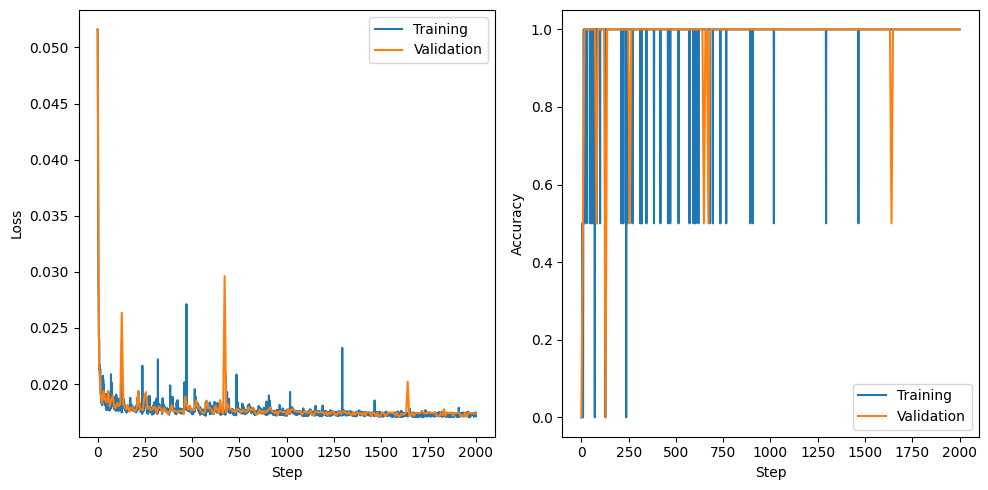

In [66]:
show_training_log(results)